In [52]:
! pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 2.7 MB/s eta 0:00:00


In [53]:
from urllib.request import urlopen
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
from mplsoccer import PyPizza, add_image

In [ ]:
URL = 'https://fbref.com/es/share/z2gl7'
df = pd.read_html(URL)[0]
# select a subset of the columns (Squad and touches columns)
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index
df = df.replace({"45+2": '47', "90+2": '92', "90+3": '93'})
df['Minute'] = pd.to_numeric(df['Minute'])
df

,Minute,Jugador,Equipo,xG,PSxG,Resultado,Distance,Parte del cuerpo,Notas,Jugador,Evento,Jugador,Evento
0,4,Álvaro Negredo,Cádiz,0.06,NaN,Bloqueado,11,Pie derecho,NaN,Fali,Pase (muerto),Fali,Obstrucción
1,13,Rubén Alcaraz,Cádiz,0.06,0.26,Salvado,18,Pie izquierdo,NaN,Isaac Carcelen,Pase (muerto),Theo Bongonda,Obstrucción
2,15,Largie Ramazani,Almería,0.04,0.02,Salvado,20,Pie izquierdo,Desviado,Largie Ramazani,Driblaje,El Bilal Touré,Pase (vivo)
3,18,Álvaro Negredo,Cádiz,0.17,0.63,Salvado,9,Cabeza,NaN,Brian Ocampo,Pase (vivo),Rubén Sobrino,Pase (vivo)
4,18,Theo Bongonda,Cádiz,0.05,NaN,Fuera del blanco,17,Pie izquierdo,Voleibol,Álvaro Negredo,Tiro,NaN,NaN
5,26,Lucas Robertone,Almería,0.04,NaN,Fuera del blanco,31,Pie derecho,Tiro libre,Lucas Robertone,Obstrucción,NaN,NaN
6,31,Lucas Robertone,Almería,0.03,0.56,Salvado,27,Pie derecho,NaN,Alejandro Pozo Pozo,Pase (vivo),Léo Baptistão,Pase (vivo)
7,35,El Bilal Touré,Almería,0.05,NaN,Bloqueado,20,Pie derecho,NaN,Largie Ramazani,Pase (vivo),Srđan Babić,Pase (vivo)
8,39,Largie Ramazani,Almería,0.27,0.16,Salvado,17,Pie derecho,NaN,Gonzalo Melero,Pase (vivo),Léo Baptistão,Pase (vivo)
9,40,Brian Ocampo,Cádiz,0.04,0.11,Salvado,17,Pie derecho,NaN,Brian Ocampo,Driblaje,Rubén Alcaraz,Pase (vivo)


In [ ]:
xG_Local = []
xG_Visitante = []
min_Local = [0]
min_Visitante = [0]

Local = df['Equipo'].iloc[0]
Visitante = df['Equipo'].iloc[-1]

for x in range(len(df['xG'])):
  if df['Equipo'][x]==Visitante:
    xG_Visitante.append(df['xG'][x])
    min_Visitante.append(df['Minute'][x])
  if df['Equipo'][x]==Local:
    xG_Local.append(df['xG'][x])
    min_Local.append(df['Minute'][x])

In [ ]:
xG_Local

[0.06, 0.06, 0.17, 0.05, 0.04, 0.11, 0.01, 0.27, 0.11, 0.07, 0.02, 0.34]

In [64]:
xG_Visitante

[0.04,
 0.04,
 0.03,
 0.05,
 0.27,
 0.03,
 0.19,
 0.1,
 0.07,
 0.05,
 0.36,
 0.07,
 0.04,
 0.69,
 0.04,
 0.05,
 0.06,
 0.1,
 0.04]

In [ ]:
def sumador(lista):
  acumulativo = [0]
  suma = 0
  for i in range(len(lista)):
    suma = suma + lista[i]
    acumulativo.append(round(suma,2))
  return acumulativo

In [ ]:
xG_Local_Total = sumador(xG_Local)
xG_Visitante_Total = sumador(xG_Visitante)

In [ ]:
min_Local

[0, 4, 13, 18, 18, 40, 43, 47, 60, 83, 85, 92, 93]

In [ ]:
xG_Local_Total

[0, 0.06, 0.12, 0.29, 0.34, 0.38, 0.49, 0.5, 0.77, 0.88, 0.95, 0.97, 1.31]

In [ ]:
min_Visitante

[0, 15, 26, 31, 35, 39, 40, 40, 52, 55, 57, 61, 62, 62, 66, 75, 82, 86, 87, 93]

In [ ]:
xG_Visitante_Total

[0,
 0.04,
 0.08,
 0.11,
 0.16,
 0.43,
 0.46,
 0.65,
 0.75,
 0.82,
 0.87,
 1.23,
 1.3,
 1.34,
 2.03,
 2.07,
 2.12,
 2.18,
 2.28,
 2.32]

In [62]:
from google.colab import drive
drive.mount('/content/drive/')
# Coge la foto que se ha subido
logo = "logo.png"
escudo = Image.open(logo)
balonR = "balon rojo.png"
balonRojo = Image.open(balonR)
balonA = "balon amarillo.png"
balonAmarillo = Image.open(balonA)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


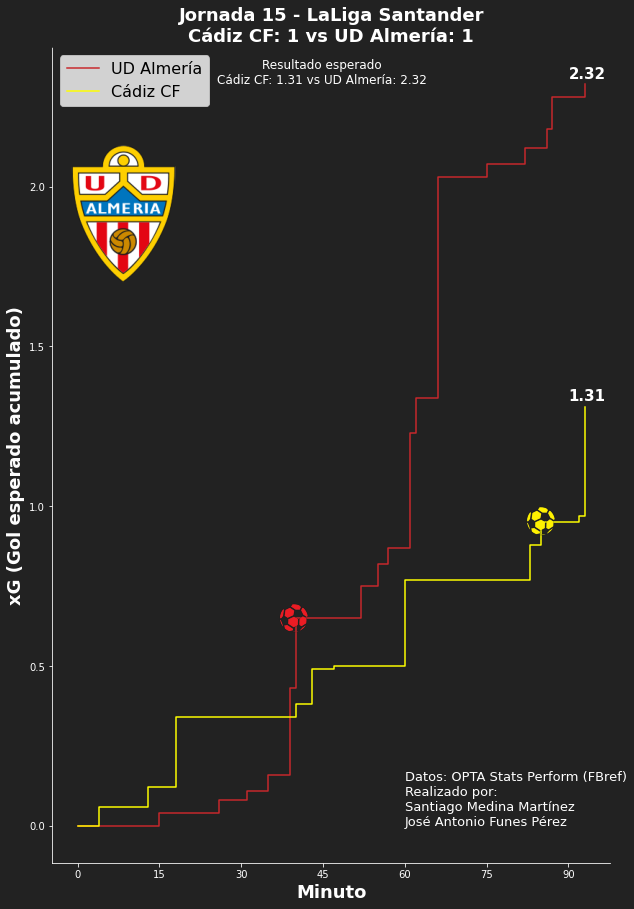

In [85]:
fig, ax = plt.subplots(figsize = (10,15))
fig.set_facecolor('#222222')
ax.patch.set_facecolor('#222222')

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minuto', fontdict={'family': 'arial', 'color' : 'White', 'weight': 'bold', 'size': 18})
plt.ylabel('xG (Gol esperado acumulado)', fontdict={'family': 'arial', 'color' : 'White', 'weight': 'bold', 'size': 18})

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('#222222')
ax.spines['right'].set_color('#222222')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

ax.step(x=min_Visitante,y=xG_Visitante_Total,where='post', label = "UD Almería", color ='#c8282c')
ax.step(x=min_Local,y=xG_Local_Total,where='post', label="Cádiz CF", color ='#ffff00')

plt.title('Jornada 15 - LaLiga Santander\nCádiz CF: 1 vs UD Almería: 1', fontdict={'family': 'arial', 'color' : 'White', 'weight': 'bold', 'size': 18})

plt.suptitle(t='Resultado esperado\nCádiz CF: 1.31 vs UD Almería: 2.32', x=0.5, y=0.87, fontdict={'family': 'arial', 'color' : 'White'})

plt.text(60, 0, 'Datos: OPTA Stats Perform (FBref)\nRealizado por:\nSantiago Medina Martínez\nJosé Antonio Funes Pérez', fontsize=13, color='white')
plt.text(90, 1.33, '1.31', fontdict={'family': 'arial', 'color' : 'White', 'weight': 'bold', 'size': 15})
plt.text(90, 2.34, '2.32', fontdict={'family': 'arial', 'color' : 'White', 'weight': 'bold', 'size': 15})

plt.legend(loc = "top left", fontsize=16)

ax_image = add_image(escudo, fig, left=0.1, bottom=0.6, width=0.25, height=0.25) 
ax_image2 = add_image(balonRojo, fig, left=0.42, bottom=0.312, width=0.08, height=0.08) 
ax_image3 = add_image(balonAmarillo, fig, left=0.763, bottom=0.401, width=0.08, height=0.08) 